### DSCI100 Group 006-35 W2 Final Project

Younghoon Kim 11371317 <br>
Kentaro Barnes 49524861 <br>
Sean Liou 86967916 <br>
Matthew Pabustan 48718266 <br>

## How does player experience level and age influence the total number of hours played?

## Datasets
### players.csv overview
A list of 196 unique participants who played on the minecraft server hosted for a scientific study with the following information for each player:
##### experience
- Originally a character `<chr>` variable, converted to factor `<fct>` containing one of the following:
    - Beginner (35)
    - Regular (36)
    - Amateur (63)  
    - Veteran (48)
    - Pro (14)
- Represents a player's self-reported experience in the game.
##### subscribe
- a logical `<lgl>` variable where TRUE indicates that the player is subscribed to the game-related newsletter, and FALSE indicates that the player has not
    - 144 players reported TRUE, 52 reported FALSE.
##### hashedEmail
- a string of characters `<chr>` that acts as a unique id to identify players in sessions.csv
##### played_hours
- A double `<dbl>` variable, indicating the number of hours a participant has spent playing on the server.
    - On average, each player spends a total of 5.85 hours.
##### name
- A character `<chr`> variable containing the player's real (first) name.
##### gender
- Originally a character `<chr>` variable, converted to factor `<fct>` containing one of the following:
    - Male (124)
    - Female (37)
    - Non-binary (15)
    - Prefer not to say (11)
    - Agender (2)
    - Two-Spirited (6)
    - Other (1)
- Represents a player's gender
##### Age
- A double `<dbl>` variable, indicating the age of the player in years.
    - On average, the players are 20.52 years old.
    - Two rows/players contain missing Age data, and thus is removed from the list.

### sessions.csv overview
A catalogue of all 1535 instances where a player logs into the server with the following information for each instance.
##### hashedEmail
- a string of characters `<chr>` indicating which unique player that logged on, allowing us to track session information along with personal information in players.csv.
##### start_time
- Originally a string of characters `<chr>` indicating the time (Day/Month/Year Hour:Minute) when the player logs ON
    - Converted to a date-time `<ddtm>` variable for ease of use.
##### end_time
- Originally a string of characters `<chr>` indicating the time (Day/Month/Year Hour:Minute) when the player logs OFF
    - Converted to a date-time `<ddtm>` variable for ease of use.
##### original_start_time
- A double `<dbl>` variable that represents the time a player logs ON, in number of milliseconds since 1970.
    - Not reported to high enough precision for comparison, and thus is removed.
##### original_end_time
- A double `<dbl>` variable that represents the time a player logs OFF, in number of milliseconds since 1970.
    - Not reported to high enough precision for comparison, and thus is removed.



In [16]:
# Load necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

In [40]:
# Reading the data

# URL to the csv files stored on github
players_url <- "https://raw.githubusercontent.com/KentoBaguetti/DSCI100-GroupProjcect/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/KentoBaguetti/DSCI100-GroupProjcect/refs/heads/main/sessions.csv"

# read the csv data into dataframes
players <- read_csv(players_url)
sessions <- read_csv(sessions_url)

players
sessions

nnn <- players |> 
    select(experience) |>
    group_by(experience) |>
    summarize(n = n())
nnn

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


In [141]:
# Tidy the data
tidy_players <- players |>
  mutate(
    experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"), ordered = TRUE),
    experience_numeric = as.numeric(experience)
  ) |>
    select(played_hours, experience_numeric, Age) |>
    filter(played_hours < 60)

tidy_players

played_hours,experience_numeric,Age
<dbl>,<dbl>,<dbl>
30.3,5,9
3.8,4,17
0.0,4,17
⋮,⋮,⋮
0.0,2,17
2.3,2,17
0.2,5,NA


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


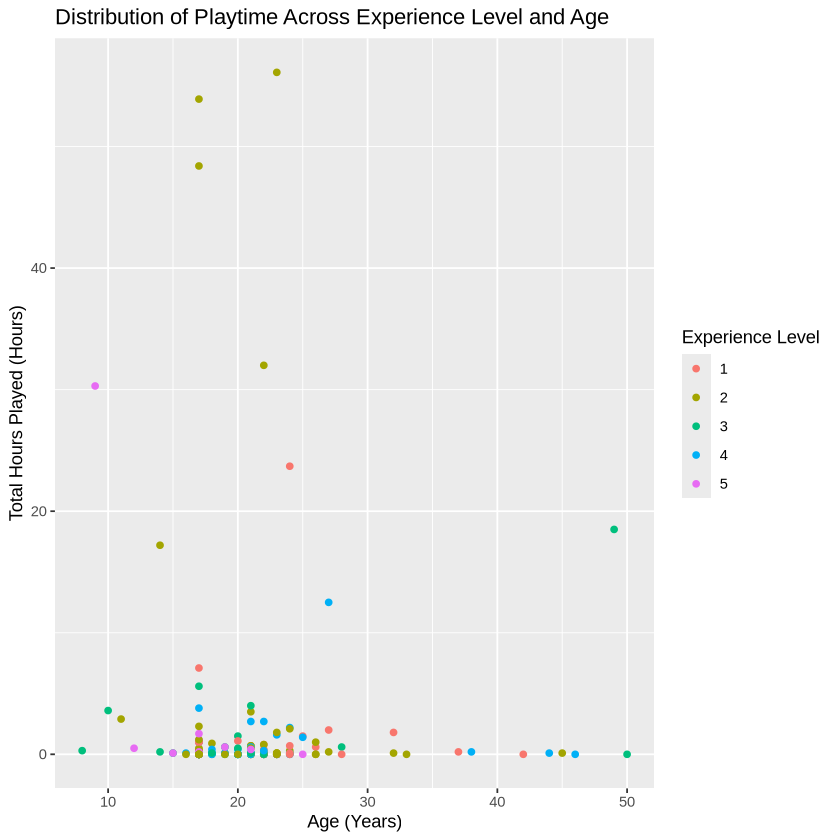

In [142]:
# Age vs Play time
prepredict_plot <- tidy_players |>
    ggplot(aes(x=Age, y=played_hours, color = as.factor(experience_numeric))) +
    geom_point() +
    labs(title = "Distribution of Playtime Across Experience Level and Age",
         x = "Age (Years)",
         y = "Total Hours Played (Hours)",
         color = "Experience Level")

prepredict_plot

In [143]:
# use knn regression as a linear relationship is not present within the data

players_split <- initial_split(tidy_players, prop = 0.75, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

knn_recipe <- recipe(played_hours ~ Age, data = tidy_players) |>
    step_impute_mean(all_numeric_predictors()) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)

players_wf <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) 

players_wf


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_impute_mean()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,7.829553,5,1.918934,Preprocessor1_Model01
2,rmse,standard,7.789403,5,1.981898,Preprocessor1_Model02
3,rmse,standard,7.550441,5,2.157875,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,rmse,standard,7.479056,5,2.014735,Preprocessor1_Model28
29,rmse,standard,7.478276,5,2.015660,Preprocessor1_Model29
30,rmse,standard,7.460793,5,2.022347,Preprocessor1_Model30


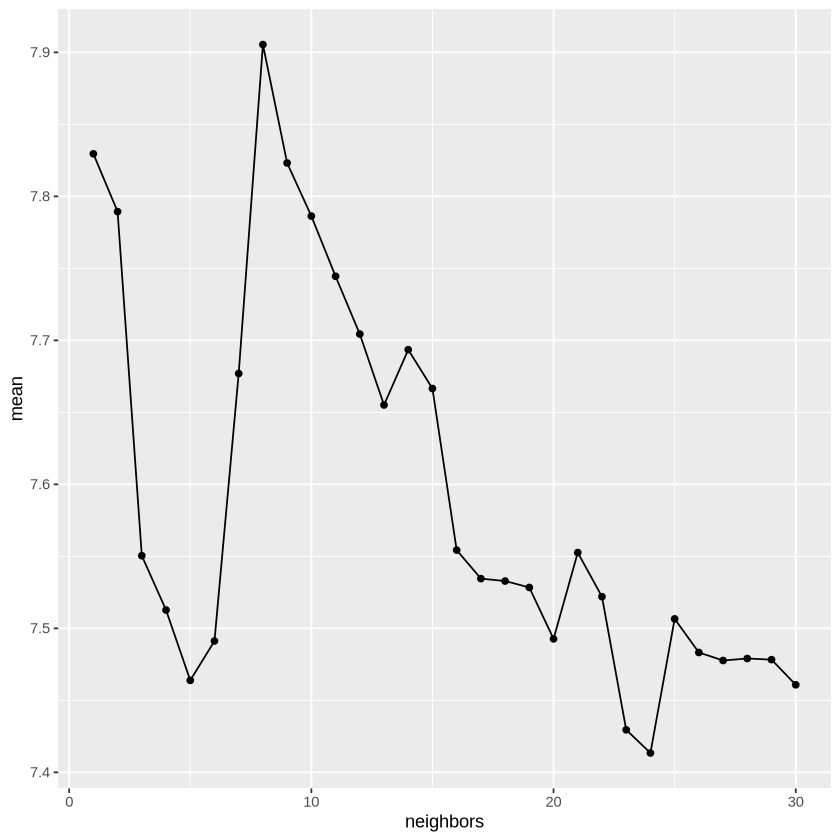

In [144]:
gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

players_results <- players_wf |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

players_results

rmse_plot <- players_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    geom_point()

rmse_plot

In [145]:
min_neighbor <- players_results |>
    filter(mean == min(mean))

min_neighbor

# lowest rmse is when k = 27

k_min <- min_neighbor |>
    pull(neighbors)

k_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
24,rmse,standard,7.41344,5,2.04497,Preprocessor1_Model24


[1] 24

In [146]:
players_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
    set_engine("kknn") |>
    set_mode("regression")

players_final_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(players_final_spec) |>
    fit(data = players_train)

players_summary <- players_final_fit |>
    predict(players_test) |>
    bind_cols(players_test) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse")

players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,5.078554


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


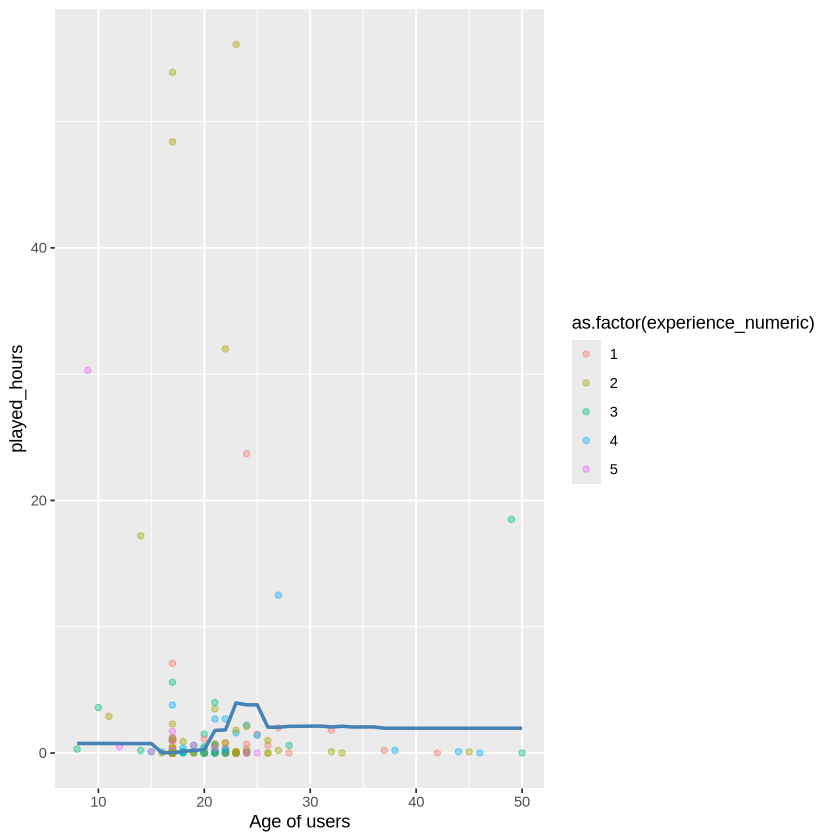

In [147]:
players_prediction_grid <- expand_grid(
  Age = seq(
    from = min(tidy_players$Age, na.rm = TRUE),
    to   = max(tidy_players$Age, na.rm = TRUE),
    by = 1
  ),
  experience_numeric = 1:5 
)

players_pred <- players_final_fit |>
    predict(players_prediction_grid)|>
    bind_cols(players_prediction_grid)

players_plot_final <- tidy_players |>
    ggplot(aes(x = Age, y = played_hours, color = as.factor(experience_numeric))) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_pred, mapping = aes(x = Age, y = .pred),
            color = "steelblue",
            linewidth = 1) +
    xlab("Age of users")

players_plot_final